In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("./TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv",usecols=[0,1,2,3,5,6,7,8,11])

In [4]:
data.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response
0,1,Male,44,1,0,> 2 Years,Yes,40454.0,1
1,2,Male,76,1,0,1-2 Year,No,33536.0,0
2,3,Male,47,1,0,> 2 Years,Yes,38294.0,1
3,4,Male,21,1,1,< 1 Year,No,28619.0,0
4,5,Female,29,1,1,< 1 Year,No,27496.0,0


# Data Cleaning 

In [5]:
def vehicleAge_toInt(vehicleage):
    if vehicleage =='> 2 Years':
        return 3
    elif vehicleage =='1-2 Year':
        return 2
    elif vehicleage=='< 1 Year':
        return 1

In [6]:
print(data.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Response'],
      dtype='object')


In [7]:
data['Vehicle_Age_int']=data['Vehicle_Age'].apply(vehicleAge_toInt)

In [8]:
data.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,Vehicle_Age_int
0,1,Male,44,1,0,> 2 Years,Yes,40454.0,1,3
1,2,Male,76,1,0,1-2 Year,No,33536.0,0,2
2,3,Male,47,1,0,> 2 Years,Yes,38294.0,1,3
3,4,Male,21,1,1,< 1 Year,No,28619.0,0,1
4,5,Female,29,1,1,< 1 Year,No,27496.0,0,1


In [9]:
def gender_to_int(gender):
    if gender=='Male':
        return 1
    elif gender=='Female':
        return 2
    

In [10]:
data['gender']=data['Gender'].apply(gender_to_int)

In [11]:
data.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,Vehicle_Age_int,gender
0,1,Male,44,1,0,> 2 Years,Yes,40454.0,1,3,1
1,2,Male,76,1,0,1-2 Year,No,33536.0,0,2,1
2,3,Male,47,1,0,> 2 Years,Yes,38294.0,1,3,1
3,4,Male,21,1,1,< 1 Year,No,28619.0,0,1,1
4,5,Female,29,1,1,< 1 Year,No,27496.0,0,1,2


In [12]:
def vehicle_damage_to_int(dam):
    if dam=='Yes':
        return 1
    elif dam=='No':
        return 2

In [13]:
data['vehicle_damage']=data['Vehicle_Damage'].apply(vehicle_damage_to_int)

In [15]:
data

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response,Vehicle_Age_int,gender,vehicle_damage
0,1,Male,44,1,0,> 2 Years,Yes,40454.0,1,3,1,1
1,2,Male,76,1,0,1-2 Year,No,33536.0,0,2,1,2
2,3,Male,47,1,0,> 2 Years,Yes,38294.0,1,3,1,1
3,4,Male,21,1,1,< 1 Year,No,28619.0,0,1,1,2
4,5,Female,29,1,1,< 1 Year,No,27496.0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,24,1,1,< 1 Year,No,21243.0,0,1,2,2
9996,9997,Male,28,1,1,< 1 Year,No,23589.0,0,1,1,2
9997,9998,Female,27,1,0,< 1 Year,Yes,33340.0,0,1,2,1
9998,9999,Female,28,1,1,< 1 Year,No,25426.0,0,1,2,2


In [14]:
data.drop(['id','Gender','Vehicle_Age','Vehicle_Damage'],inplace=True,axis=1)

In [15]:
data.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Response,Vehicle_Age_int,gender,vehicle_damage
0,44,1,0,40454.0,1,3,1,1
1,76,1,0,33536.0,0,2,1,2
2,47,1,0,38294.0,1,3,1,1
3,21,1,1,28619.0,0,1,1,2
4,29,1,1,27496.0,0,1,2,2


In [16]:
X=data.drop('Response',axis=1)
Y=data['Response']

In [17]:
data.columns

Index(['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium',
       'Response', 'Vehicle_Age_int', 'gender', 'vehicle_damage'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [20]:
X_train

,Age,Driving_License,Previously_Insured,Annual_Premium,Vehicle_Age_int,gender,vehicle_damage
8371,28,1,1,25382.0,1,1,2
5027,44,1,0,2630.0,2,1,1
9234,41,1,0,47015.0,3,1,1
3944,50,1,0,31339.0,2,1,2
6862,46,1,0,40329.0,3,1,1
...,...,...,...,...,...,...,...
5734,58,1,1,2630.0,2,1,2
5191,24,1,1,28816.0,1,2,2
5390,53,1,0,59987.0,2,1,1
860,42,1,0,30408.0,2,1,1


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle

models = {
    'logistic_regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    'support_vector_machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, Y_train) 
    Y_pred = model.predict(X_test)  
    report = classification_report(Y_test, Y_pred)  
    print(f"Classification Report for {name}:")
    print(report)
    filename = f'{name}_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        print(f"Model '{name}' saved to {filename}")


Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2897
           1       0.00      0.00      0.00       403

    accuracy                           0.88      3300
   macro avg       0.44      0.50      0.47      3300
weighted avg       0.77      0.88      0.82      3300

Model 'logistic_regression' saved to logistic_regression_model.pkl
Classification Report for random_forest:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2897
           1       0.28      0.20      0.23       403

    accuracy                           0.84      3300
   macro avg       0.58      0.56      0.57      3300
weighted avg       0.82      0.84      0.83      3300

Model 'random_forest' saved to random_forest_model.pkl
Classification Report for support_vector_machine:
              precision    recall  f1-score   support

           0       0.88      1.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

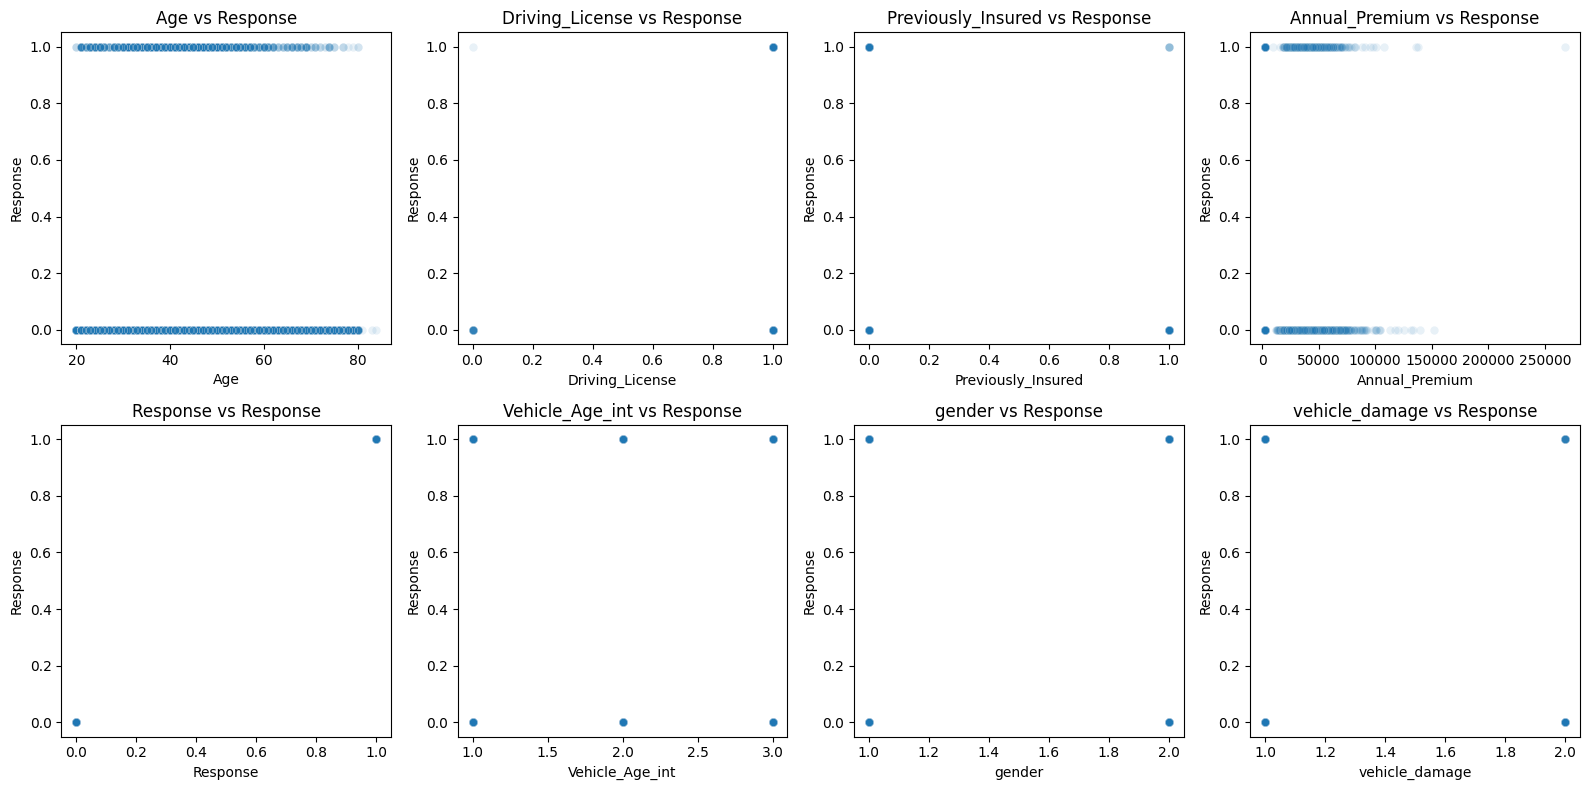

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 
            'Response', 'Vehicle_Age_int', 'gender', 'vehicle_damage']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(x=feature, y='Response', data=train, alpha=0.1, ax=ax)
    ax.set_title(f"{feature} vs Response")
    ax.set_xlabel(feature)
    ax.set_ylabel("Response")

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()